#Challenges Aula 3 Quarentena Dados - Alura

## Desafio 1: Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [0]:
#Importando library
import pandas as pd
imdb = pd.read_csv("https://raw.githubusercontent.com/levisouuza/QuarentenaDados/master/Datasets/movie_metadata_imdb.csv")
imdb.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


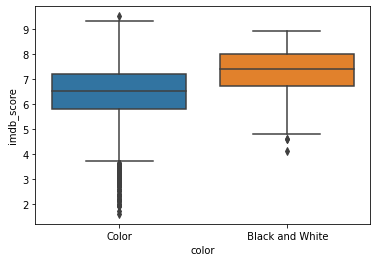

In [0]:
#importando library de visualização, excluindo os registro NaN e criando o boxplot com color and Black and White.
import seaborn as sns

imdb_cor_bw = imdb[['color','imdb_score']].dropna()

sns.boxplot(data = imdb_cor_bw, x='color', y= 'imdb_score')

##Desafio 2: No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).


In [0]:
#criando feature lucro e posteriormente retornando dados apenas dos filmes americanos devido a problema de conversão monetária

imdb['lucro'] = imdb['gross'] - imdb['budget']
imdb_usa = imdb.query("country == 'USA'")

imdb_usa.sort_values('lucro').head(1)['movie_title']


5    John Carter 
Name: movie_title, dtype: object

##Desafio 3: Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [0]:
imdb_usa = imdb.query("country =='USA'")
filme_2016 = imdb_usa.query('title_year== 2016').dropna()
filme_2016[['movie_title','title_year','lucro']].head(15)

,movie_title,title_year,lucro
10,Batman v Superman: Dawn of Justice,2016.0,80249062.0
27,Captain America: Civil War,2016.0,157197282.0
57,Star Trek Beyond,2016.0,-54531374.0
63,The Legend of Tarzan,2016.0,-55948241.0
65,X-Men: Apocalypse,2016.0,-23014913.0
73,Suicide Squad,2016.0,-13912817.0
92,Independence Day: Resurgence,2016.0,-62684455.0
106,Alice Through the Looking Glass,2016.0,-93153376.0
108,Warcraft,2016.0,-113021005.0
137,The Legend of Tarzan,2016.0,-55948241.0


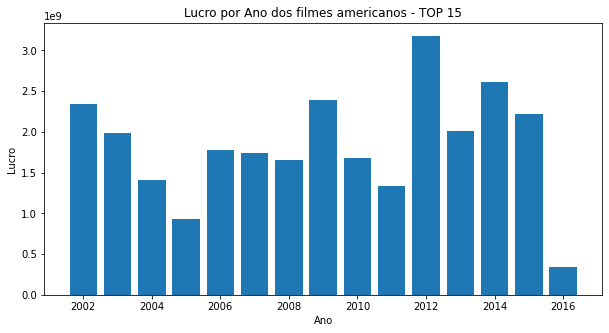

<Figure size 720x360 with 0 Axes>

In [0]:

lucro_por_ano = imdb_usa.groupby('title_year')['lucro'].sum().to_frame()
lucro_por_ano = lucro_por_ano.reset_index().sort_values('title_year',ascending=False)

plt.figure(figsize=(10,5))
plt.title('Lucro por Ano dos filmes americanos - TOP 15')
plt.bar(data=lucro_por_ano.head(15), x='title_year', height='lucro')
plt.xlabel('Ano')
plt.ylabel('Lucro')
plt.figure(figsize=(10,5))

plt.show()






É possível observar que a maioria dos filmes do último ano apresentam prejuízo em suas receita. No geral o ano de 2016 apresenta um lucro menor do que, pelo menos, últimos 15 anos de cinematografia, inclusive, lucro inferior aos filmes do ano de 2005, ano de recessão econômica mundial. Portanto, baseado no dataset atual, pode-se dizer que não houve tempo hábil para ter um ROI positivo no momento da extração deste dataset. 

##Desafio 4: Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

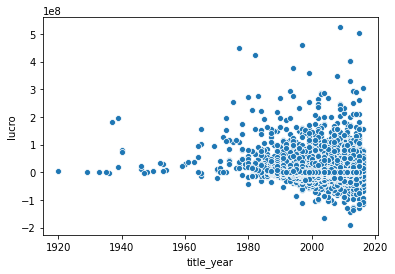

In [0]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

In [0]:
#filtrando todos os filmes com ano menor 1940 e ordenando de forma decrescente para obter os que tiveram maior lucro
imdb_usa.query('title_year < 1940')[['movie_title','title_year','lucro']].sort_values('lucro',ascending=False).head(2)

,movie_title,title_year,lucro
3970,Gone with the Wind,1939.0,194678278.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0


##Desafio 5: No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
filmes_por_diretor
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


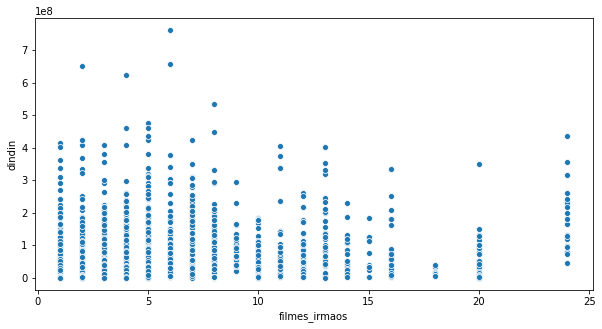

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [0]:
gross_director.drop_duplicates('director_name').query('filmes_irmaos ==18')

,director_name,dindin,filmes_irmaos
1549,Woody Allen,7496522.0,18.0


##Desafio 6: Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

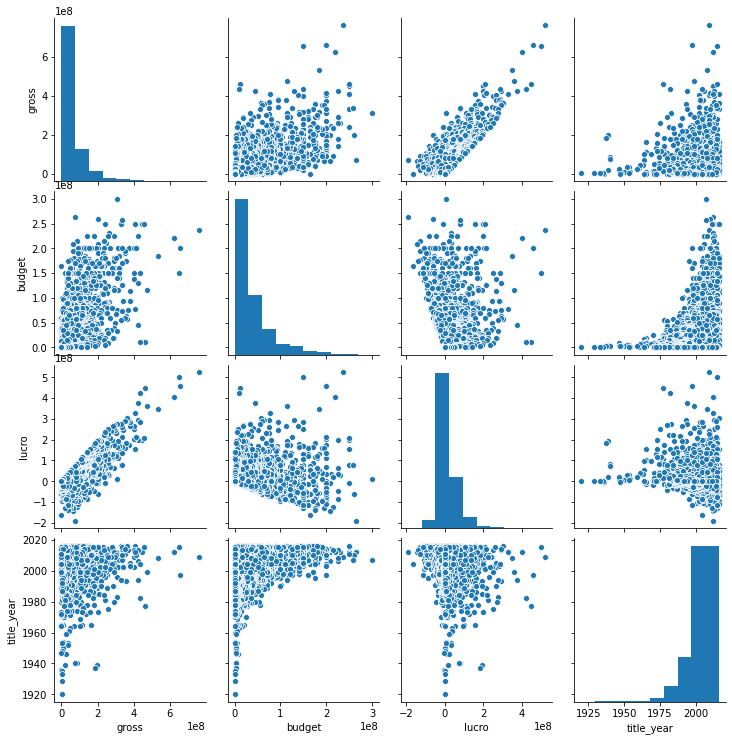

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]].dropna())

Pontos que devem ser destacados:
- Filmes que apresentam maior faturamento possuem maior lucro.
- Com o passar do tempo as despesas de criação cinematográfica está evoluindo. 
- Ao longo do tempo os lucros do filmes aumentam.
- A maioria dos filmes estam em break-even.

##Desafio 7: Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
#Correlação considerando todos os anos. 
imdb_usa[['gross','budget','lucro','title_year','num_critic_for_reviews','movie_facebook_likes']].corr()

,gross,budget,lucro,title_year,num_critic_for_reviews,movie_facebook_likes
gross,1.000000,0.646158,0.799260,0.036865,0.496316,0.387800
budget,0.646158,1.000000,0.057774,0.232640,0.526367,0.353245
lucro,0.799260,0.057774,1.000000,-0.122092,0.252738,0.237029
title_year,0.036865,0.232640,-0.122092,1.000000,0.303602,0.226859
num_critic_for_reviews,0.496316,0.526367,0.252738,0.303602,1.000000,0.687523
movie_facebook_likes,0.387800,0.353245,0.237029,0.226859,0.687523,1.000000


In [0]:
#Correlação considerando o período pré ano 2000
filmes_2000 = imdb_usa.query('title_year < 2000')
filmes_2000[['gross', 'budget','lucro','title_year','num_critic_for_reviews','movie_facebook_likes']].corr()

,gross,budget,lucro,title_year,num_critic_for_reviews,movie_facebook_likes
gross,1.000000,0.405612,0.909406,-0.051854,0.454776,0.313560
budget,0.405612,1.000000,-0.011294,0.399758,0.171634,0.038055
lucro,0.909406,-0.011294,1.000000,-0.191317,0.414736,0.331549
title_year,-0.051854,0.399758,-0.191317,1.000000,0.010185,-0.013143
num_critic_for_reviews,0.454776,0.171634,0.414736,0.010185,1.000000,0.496520
movie_facebook_likes,0.313560,0.038055,0.331549,-0.013143,0.496520,1.000000


In [0]:
#Correlação considerando o período maior ou igual ao ano 2000
filmes_2000 = imdb_usa.query('title_year >= 2000')
filmes_2000[['gross', 'budget','lucro','title_year','num_critic_for_reviews','movie_facebook_likes']].corr()

,gross,budget,lucro,title_year,num_critic_for_reviews,movie_facebook_likes
gross,1.000000,0.708050,0.774906,0.108058,0.548048,0.417628
budget,0.708050,1.000000,0.102324,0.065052,0.538089,0.358815
lucro,0.774906,0.102324,1.000000,0.034094,0.311930,0.275433
title_year,0.108058,0.065052,0.034094,1.000000,0.260533,0.368026
num_critic_for_reviews,0.548048,0.538089,0.311930,0.260533,1.000000,0.699418
movie_facebook_likes,0.417628,0.358815,0.275433,0.368026,0.699418,1.000000


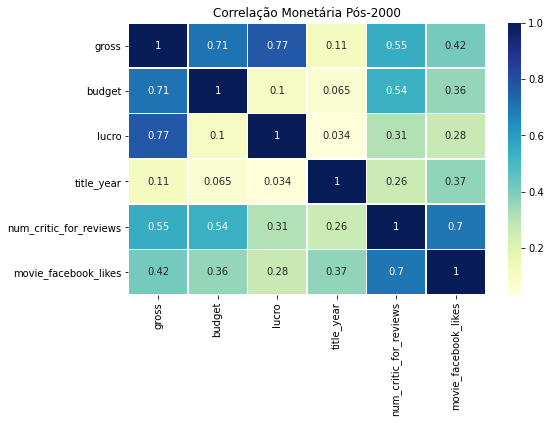

In [0]:
plt.figure(figsize=(8,5))
plt.title('Correlação Monetária Pós-2000')

corr_2000 = filmes_2000[['gross', 'budget','lucro','title_year','num_critic_for_reviews','movie_facebook_likes']].corr()

sns.heatmap(corr_2000, annot=True,  linewidths=.5, cmap="YlGnBu")
plt.show()

 - É possível verificar a relação entre o anos e o lucro dos filmes. Pode-se dizer que a indústria se fortaleceu ao longo do caminho acarrentando em filmes mais lucrativos. Isso pode ser devido a  valor intrínseco da moeda ou aumento da cultura cinematográfica por parte da população.

##Desafio 8: Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

<Figure size 720x360 with 0 Axes>

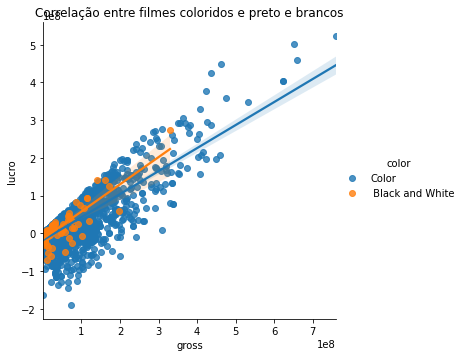

In [0]:
plt.figure(figsize= (10,5))
sns.lmplot(data=imdb_usa, x='gross', y='lucro', hue="color")

plt.show()

##Desafio 9: Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

Baseado na amostra, é possível dizer que filmes lucrativos não significam em maiores ratings de avaliação. Muitas vezes, filmes que possuem prejuízo em caixa, obtiveram rankings maiores.

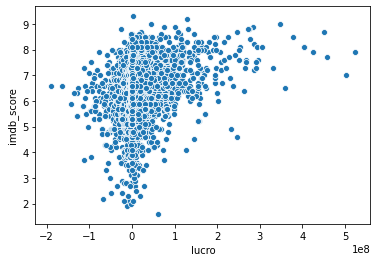

In [0]:
sns.scatterplot(data=imdb_usa, x='lucro',y='imdb_score')

É possível dizer que filmes com maiores likes em suas páginas no facebook possuem maiores scores de avaliações. Maiores likes no facebook pode ser traduzido como popularidade. 

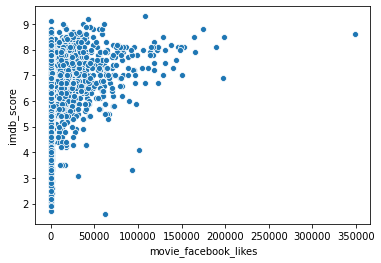

In [0]:
sns.scatterplot(data=imdb_usa, x='movie_facebook_likes',y='imdb_score')